# Base Line

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./CO2 Emissions_Canada.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [5]:
list(df.columns)

['Make',
 'Model',
 'Vehicle Class',
 'Engine Size(L)',
 'Cylinders',
 'Transmission',
 'Fuel Type',
 'Fuel Consumption City (L/100 km)',
 'Fuel Consumption Hwy (L/100 km)',
 'Fuel Consumption Comb (L/100 km)',
 'Fuel Consumption Comb (mpg)',
 'CO2 Emissions(g/km)']

# Data Preprocessing

In [6]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
df.duplicated().sum()

1103

In [8]:
df.shape

(7385, 12)

In [9]:
df = df.drop_duplicates(keep='first')

In [10]:
df.shape

(6282, 12)

## Change the column names

In [11]:
df.columns = df.columns.str.replace(" (L/100 km)", "")
df.columns = df.columns.str.replace("(L)", "")
df.columns = df.columns.str.replace("(g/km)", "")
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.lower()

In [12]:
list(df.columns)

['make',
 'model',
 'vehicle_class',
 'engine_size',
 'cylinders',
 'transmission',
 'fuel_type',
 'fuel_consumption_city',
 'fuel_consumption_hwy',
 'fuel_consumption_comb',
 'fuel_consumption_comb_(mpg)',
 'co2_emissions']

# Visualization

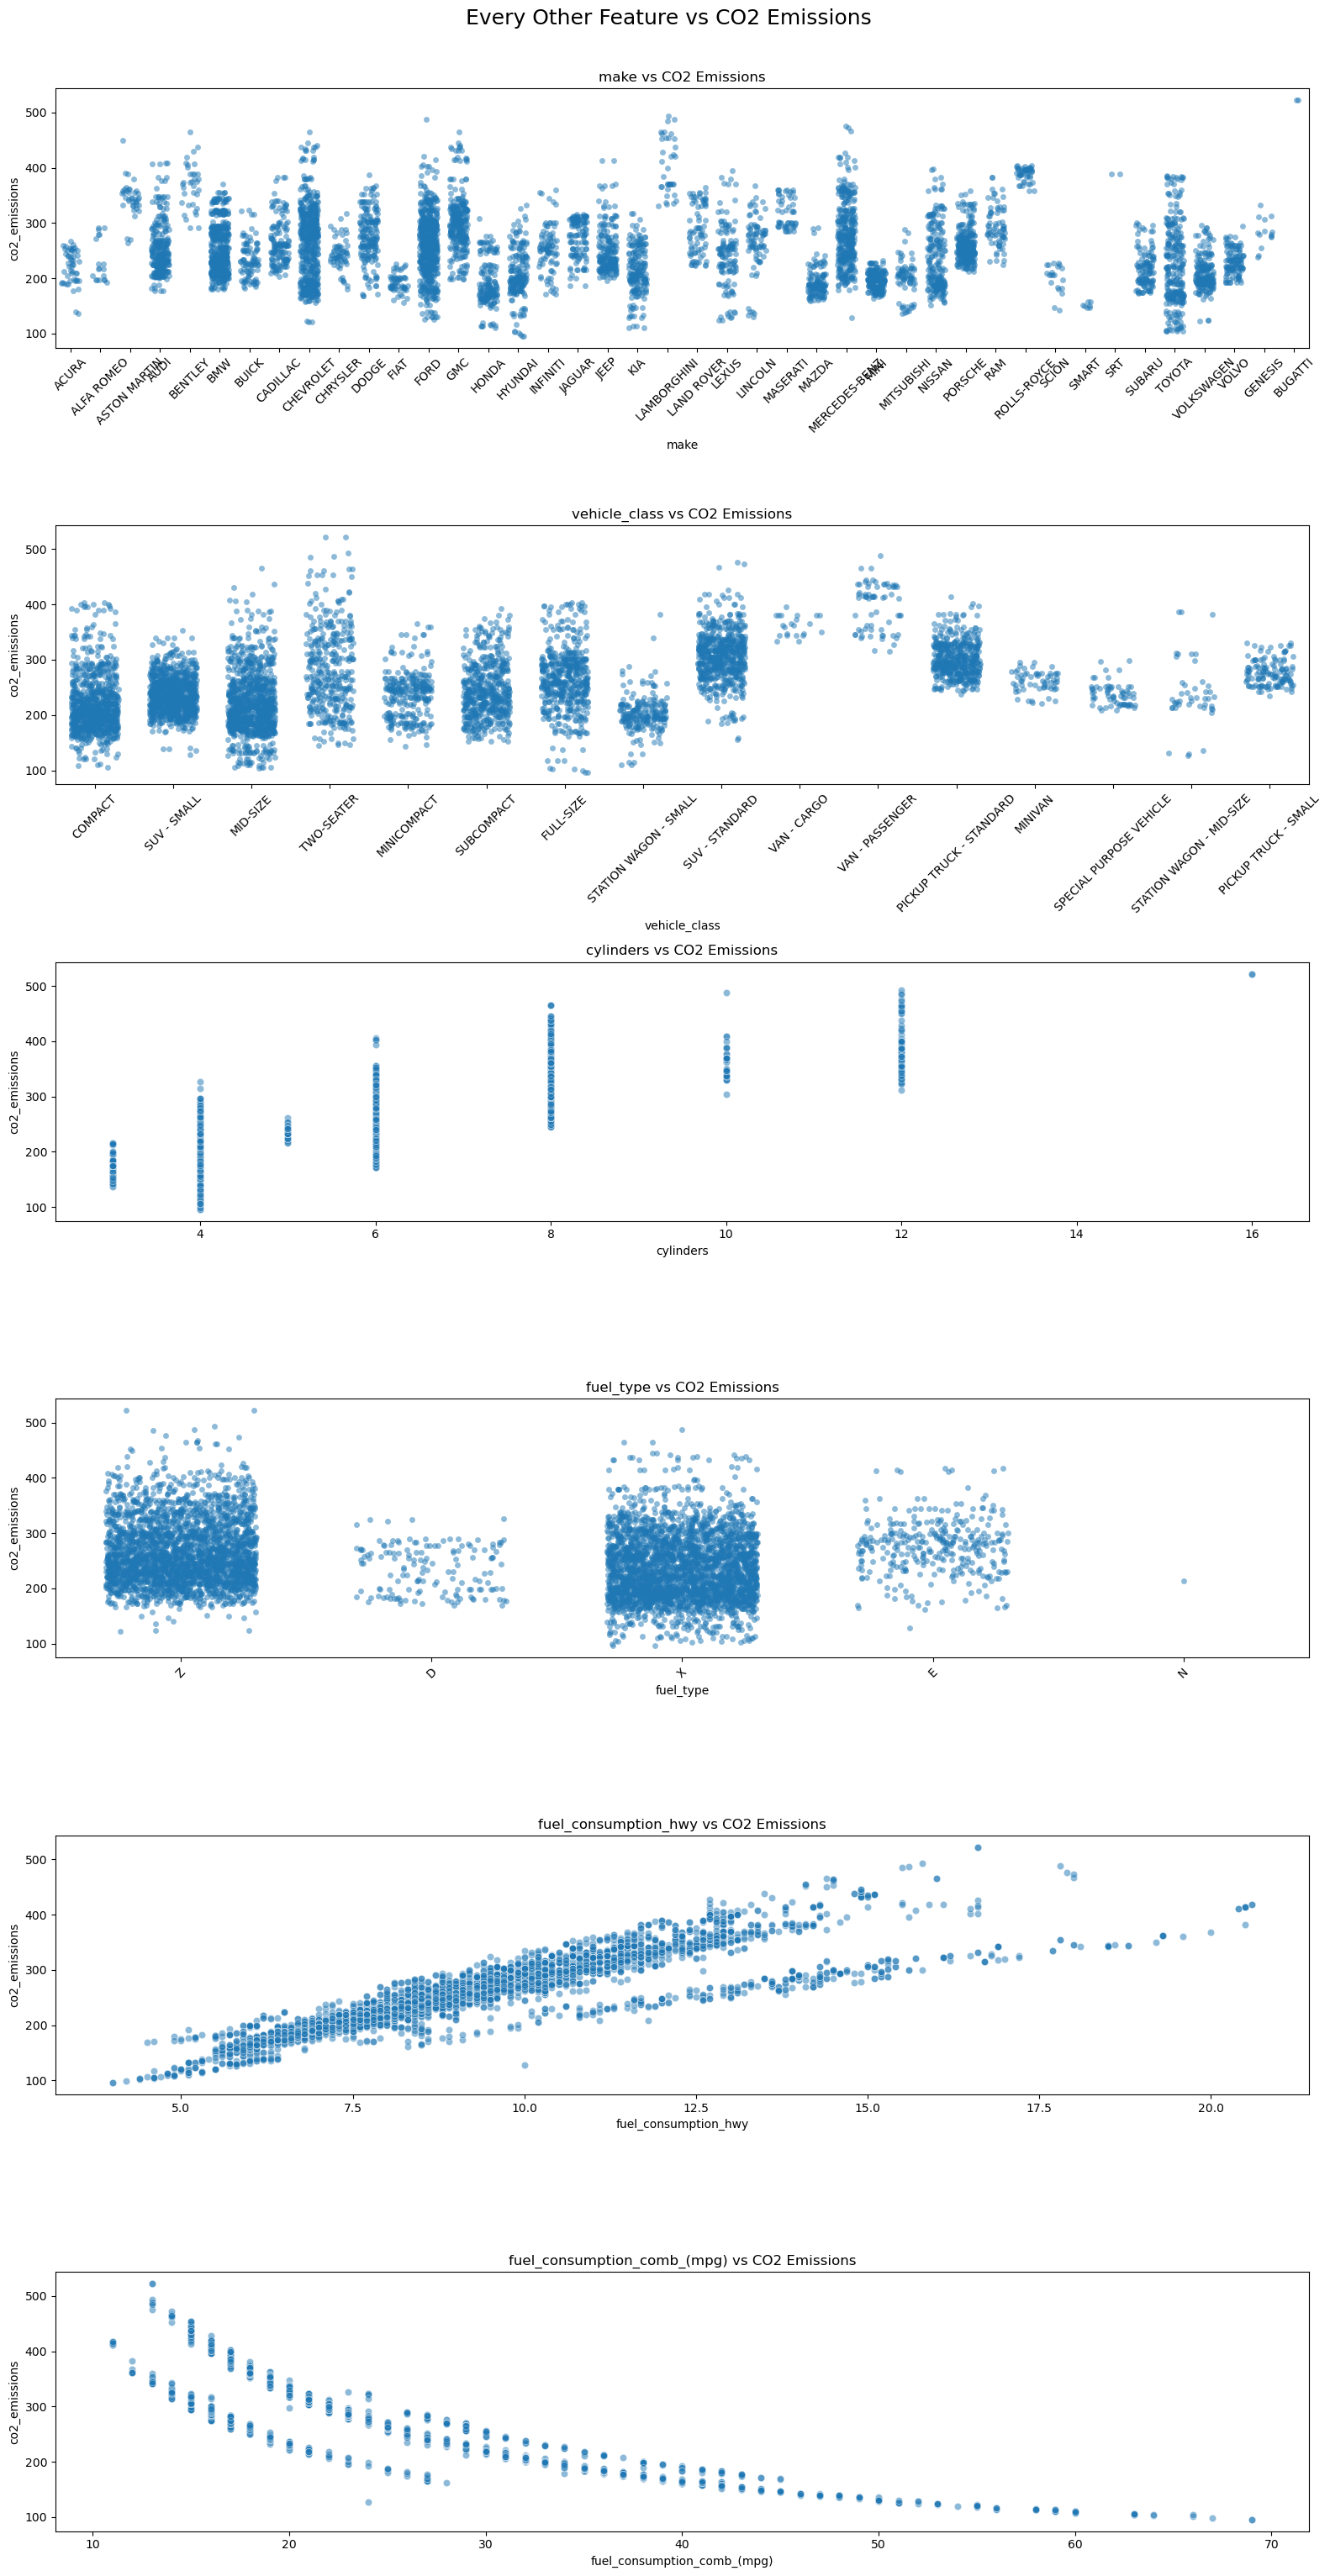

In [13]:
import seaborn as sns
# Exclude the target column
features = [col for i, col in enumerate(df.columns) 
            if col != 'co2_emissions' and i % 2 == 0]
 
# Plot setup
plt.figure(figsize=(16, 5 * len(features)))
 
for idx, feature in enumerate(features):
    plt.subplot(len(features), 1, idx + 1)
    if df[feature].dtype == 'object':
        sns.stripplot(data=df, x=feature, y='co2_emissions', jitter=0.3, alpha=0.5)
        plt.xticks(rotation=45)
    else:
        sns.scatterplot(data=df, x=feature, y='co2_emissions', alpha=0.5)
    plt.title(f"{feature} vs CO2 Emissions")
 
plt.tight_layout()
plt.suptitle("Every Other Feature vs CO2 Emissions", fontsize=18, y=1.02)
plt.show()

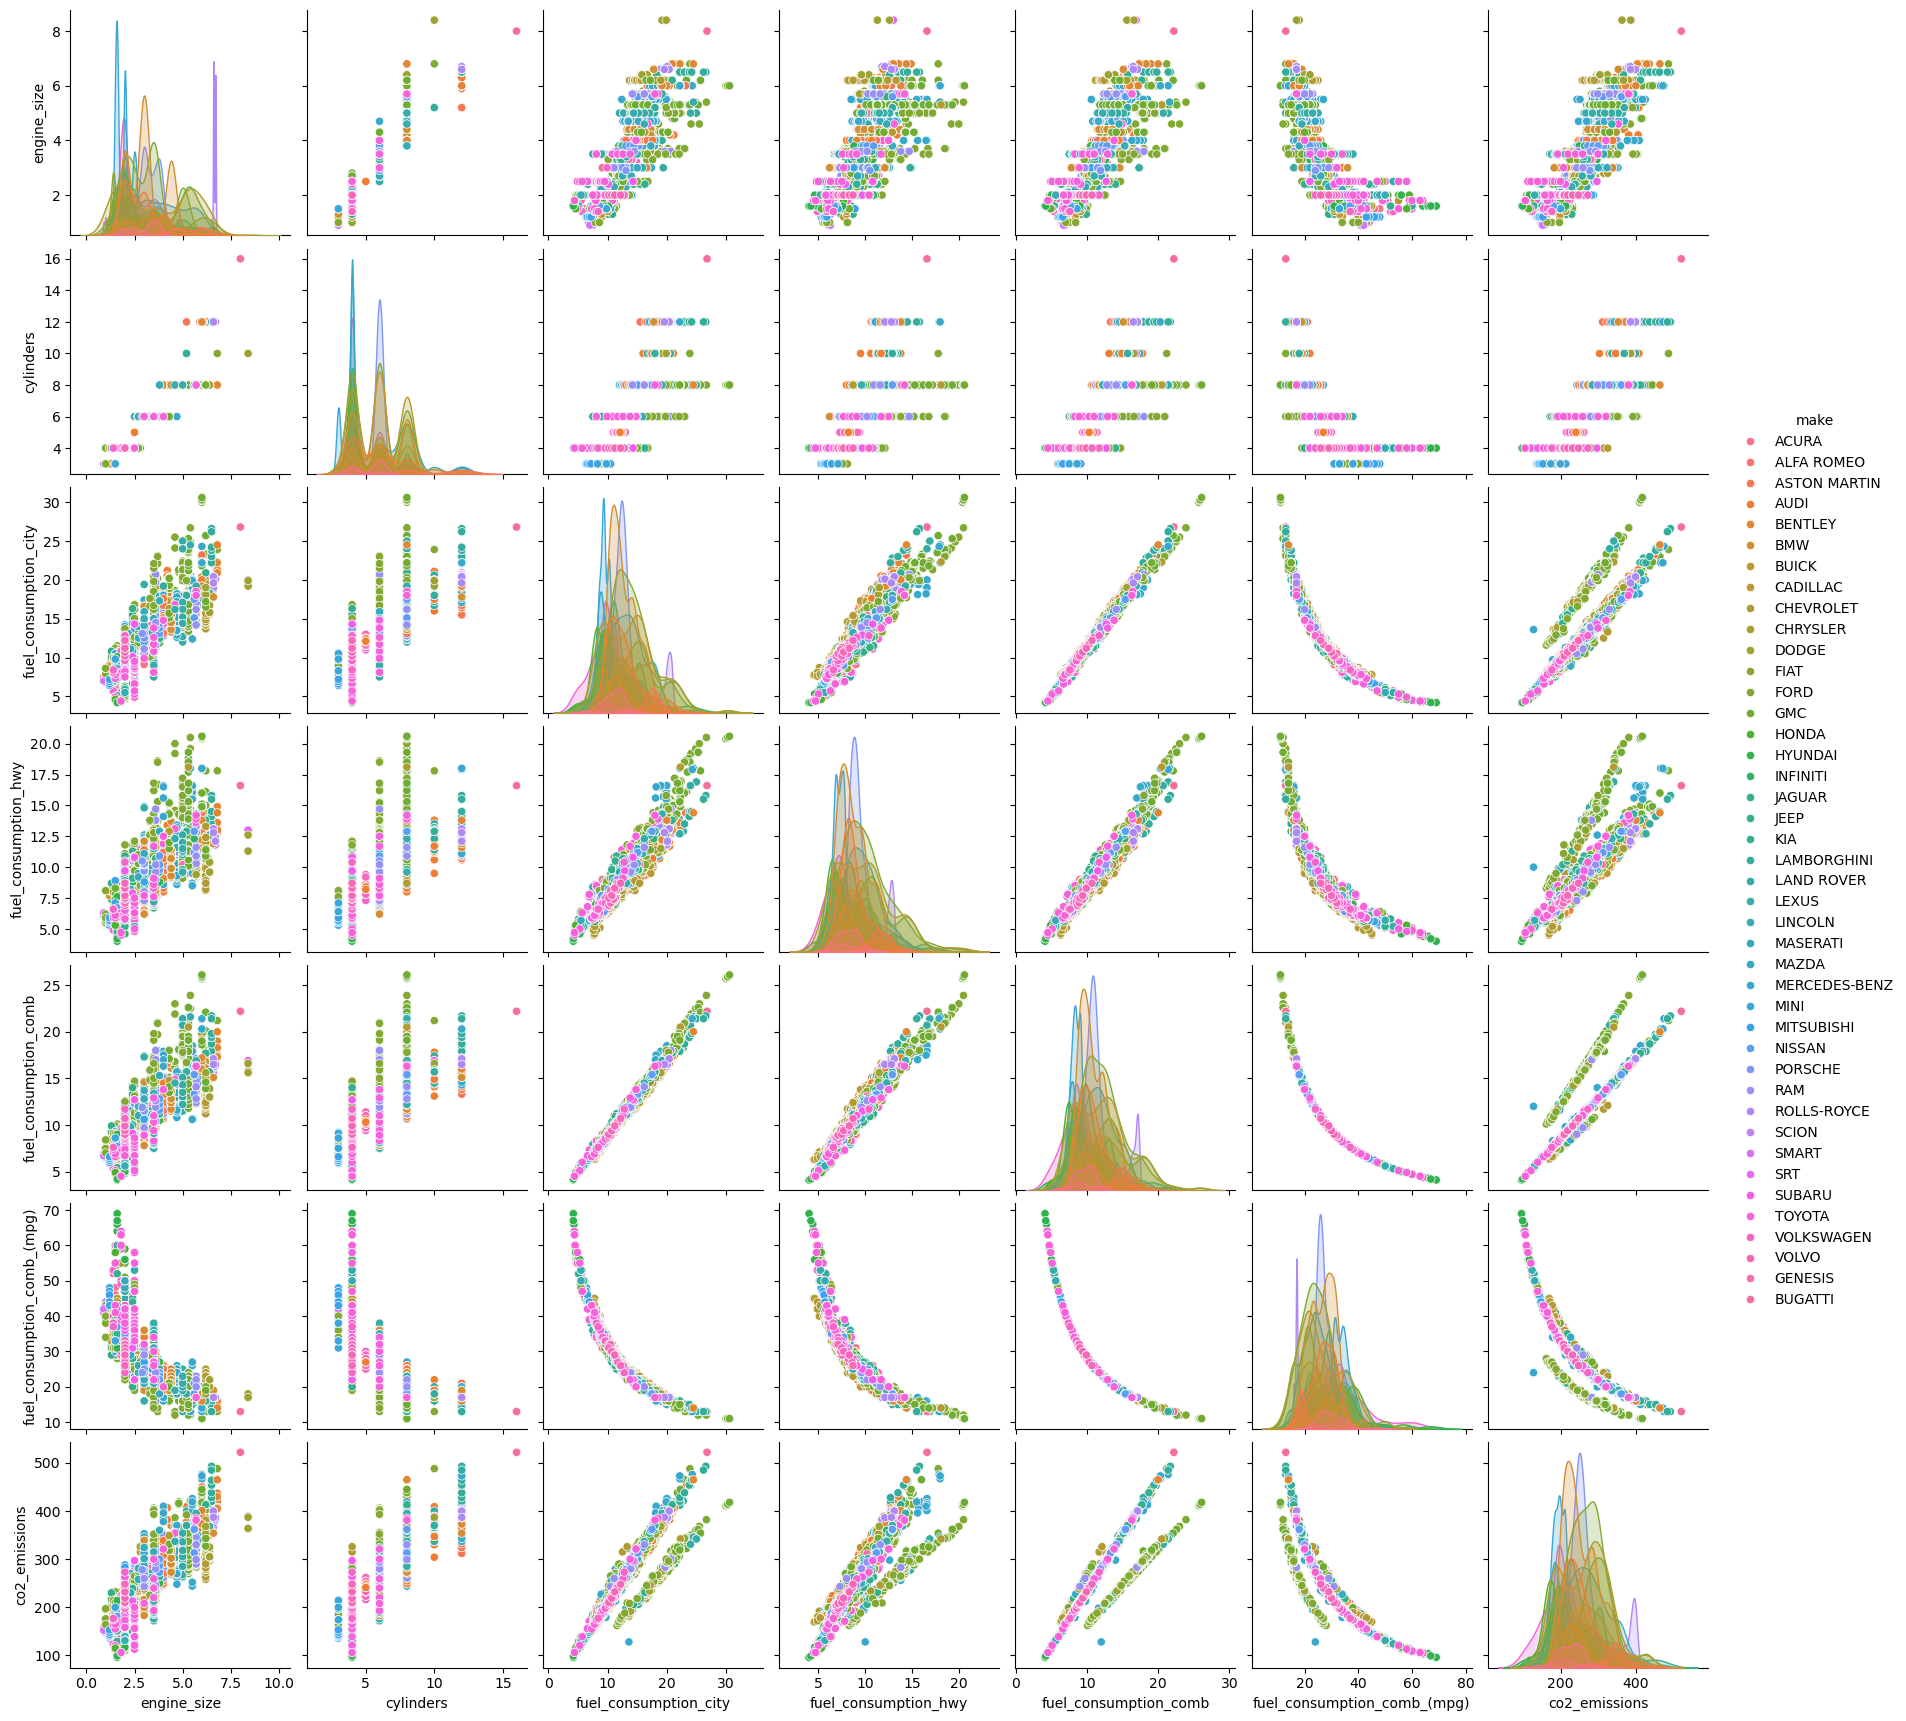

In [15]:
sns.pairplot(df, hue='make')

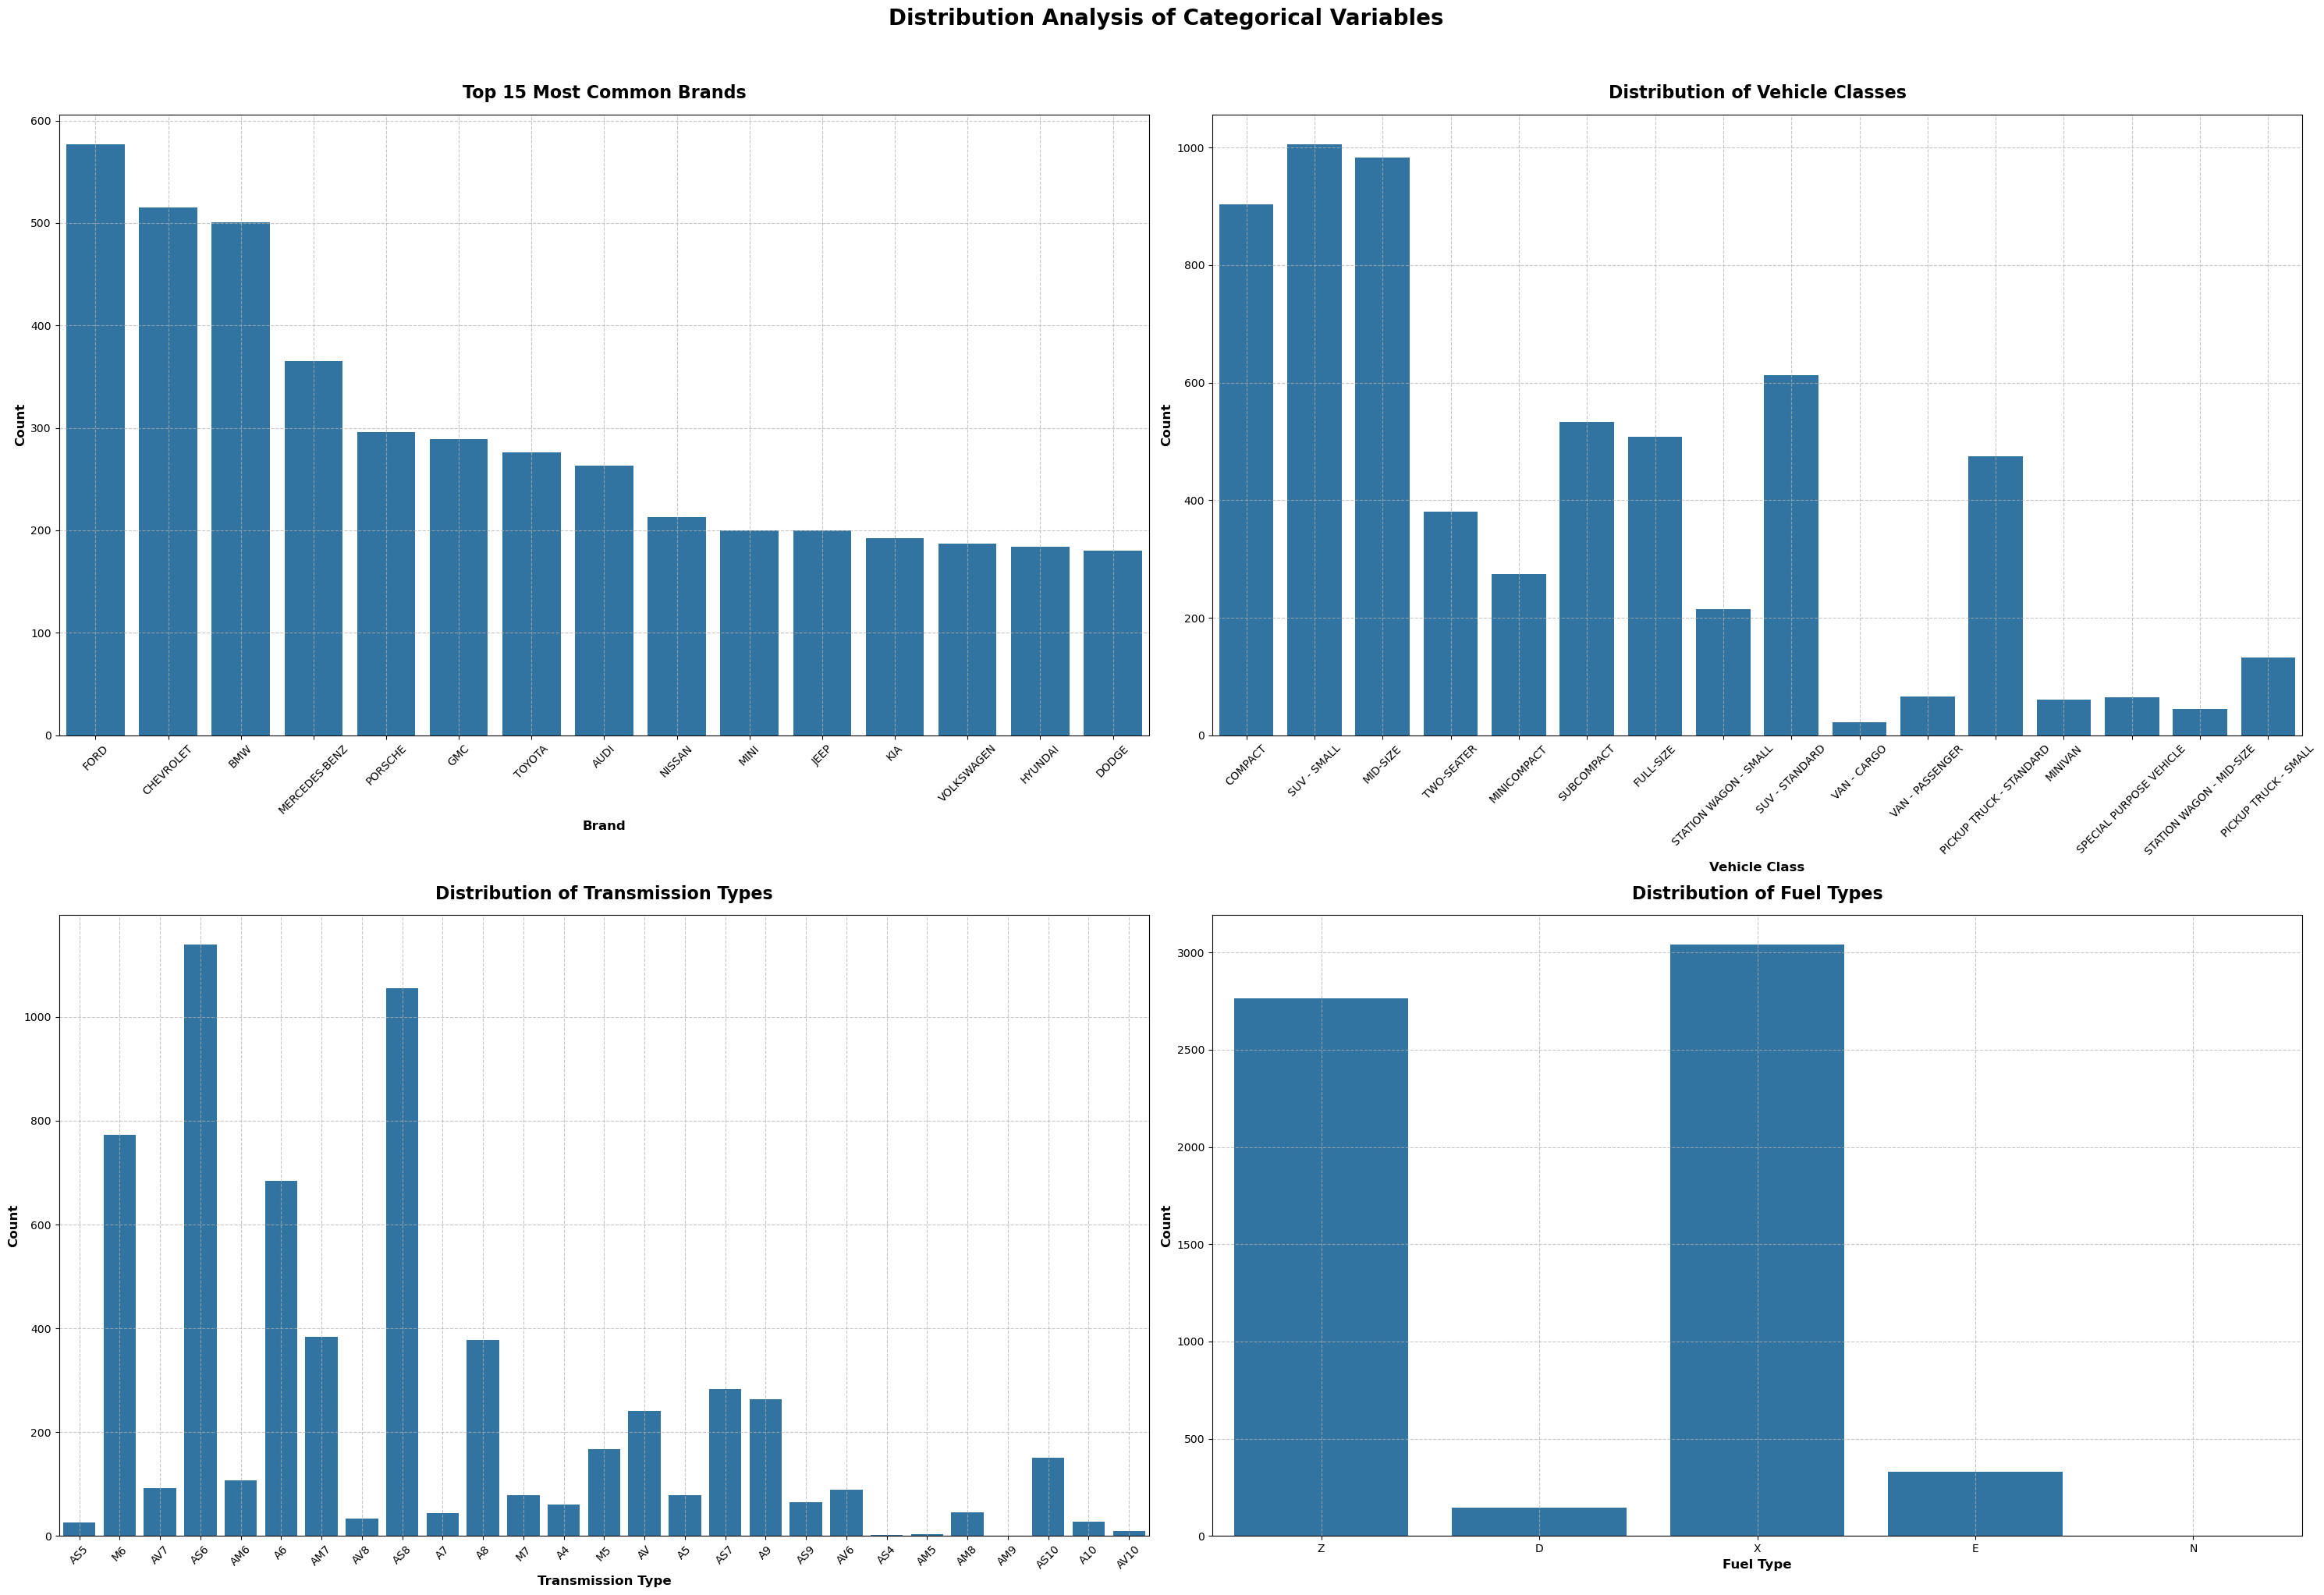

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(30, 20))

sns.countplot(data=df, x='make', ax=axes[0,0], 
              order=df['make'].value_counts().iloc[:15].index)
axes[0,0].set_title('Top 15 Most Common Brands', pad=15, fontsize=16, fontweight='bold')
axes[0,0].set_xlabel('Brand', fontsize=12, fontweight='bold')
axes[0,0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0,0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0,0].tick_params(axis='y', labelsize=10)
axes[0,0].grid(True, linestyle='--', alpha=0.7)

sns.countplot(data=df, x='vehicle_class', ax=axes[0,1])
axes[0,1].set_title('Distribution of Vehicle Classes', pad=15, fontsize=16, fontweight='bold')
axes[0,1].set_xlabel('Vehicle Class', fontsize=12, fontweight='bold')
axes[0,1].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0,1].tick_params(axis='x', rotation=45, labelsize=10)
axes[0,1].tick_params(axis='y', labelsize=10)
axes[0,1].grid(True, linestyle='--', alpha=0.7)

sns.countplot(data=df, x='transmission', ax=axes[1,0])
axes[1,0].set_title('Distribution of Transmission Types', pad=15, fontsize=16, fontweight='bold')
axes[1,0].set_xlabel('Transmission Type', fontsize=12, fontweight='bold')
axes[1,0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1,0].tick_params(axis='x', rotation=45, labelsize=10)
axes[1,0].tick_params(axis='y', labelsize=10)
axes[1,0].grid(True, linestyle='--', alpha=0.7)

sns.countplot(data=df, x='fuel_type', ax=axes[1,1])
axes[1,1].set_title('Distribution of Fuel Types', pad=15, fontsize=16, fontweight='bold')
axes[1,1].set_xlabel('Fuel Type', fontsize=12, fontweight='bold')
axes[1,1].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1,1].tick_params(axis='x', labelsize=10)
axes[1,1].tick_params(axis='y', labelsize=10)
axes[1,1].grid(True, linestyle='--', alpha=0.7)

plt.suptitle('Distribution Analysis of Categorical Variables', fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Heatmap

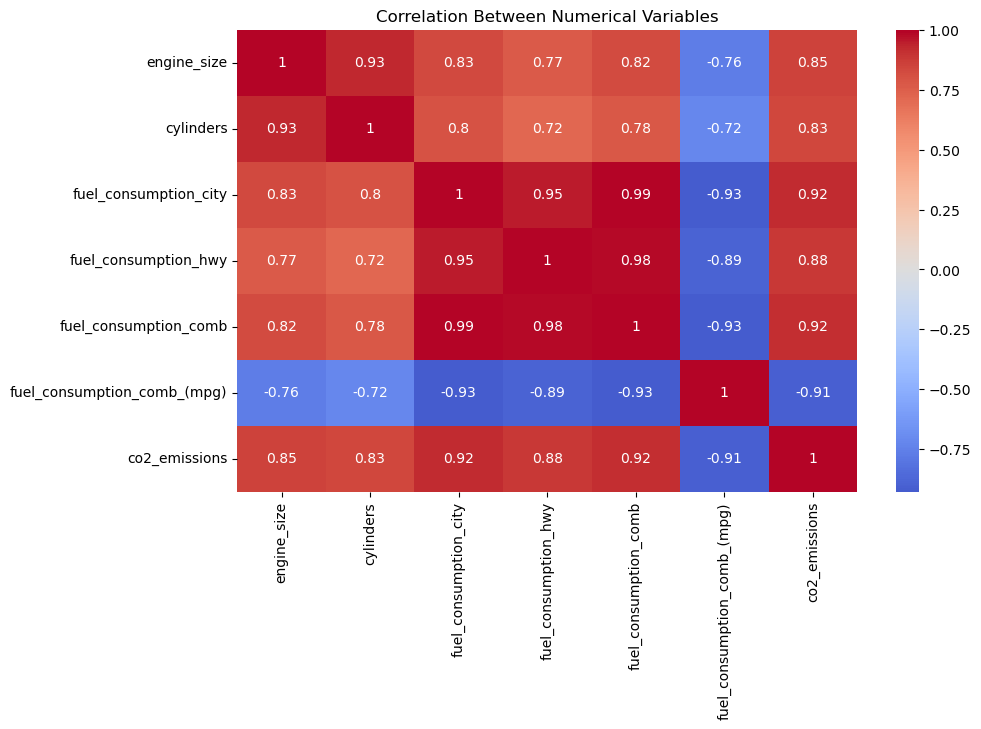

In [17]:
numeric_cols = ['engine_size', 'cylinders', 'fuel_consumption_city', 
                'fuel_consumption_hwy', 'fuel_consumption_comb', 
                'fuel_consumption_comb_(mpg)', 'co2_emissions']

plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Numerical Variables')
plt.show()

# Label Encoder

In [18]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['make','model','vehicle_class','transmission','fuel_type']
label_encoders = {}

for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le # We keep encoders for recycling

In [19]:
df.head(5)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_(mpg),co2_emissions
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33,196
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29,221
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,48,136
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25,255
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27,244


# Train Test Split

In [20]:
y= df['co2_emissions'].values
x= df.drop(columns=['co2_emissions']).values

In [21]:
y= df['co2_emissions'].values
x= df.drop(columns=['co2_emissions','make','model']).values

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.75,random_state=42)

# MinMaxScalar

In [23]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import r2_score
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [24]:
print( x_train.shape )
print( x_test.shape )
print( y_train.shape )
print( y_test.shape )

(4711, 9)
(1571, 9)
(4711,)
(1571,)


# Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)

In [26]:
model.coef_

array([   9.62959772,   44.68836193,   66.79160786,   -2.21060647,
         32.79091716,   36.56212588,   60.11789875,   70.75691971,
       -153.32596112])

In [27]:
model.intercept_

185.54080867275076

In [28]:
pd.DataFrame(model.coef_)

,0
0,9.629598
1,44.688362
2,66.791608
3,-2.210606
4,32.790917
5,36.562126
6,60.117899
7,70.756920
8,-153.325961


# Calculating the metrics

In [29]:
from sklearn import metrics
# Compute metrics
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

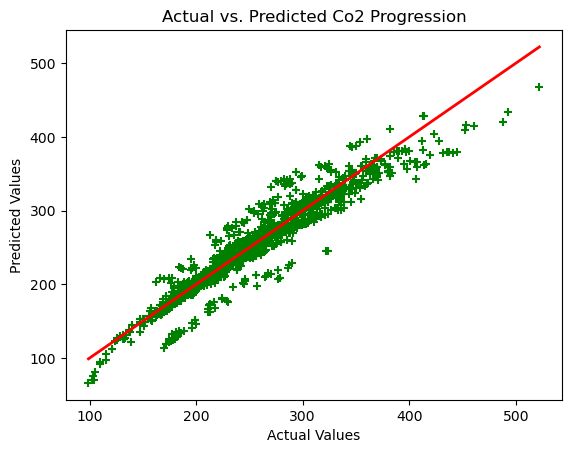

In [30]:
# Display metrics
metrics_df = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'Mean Absolute Error', 'R^2 Score'],
    'Value': [mse, mae, r2]
})


# Plot actual vs predicted
plt.figure()
plt.scatter(y_test, y_pred,marker = "+" , color = "green")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", lw=2)
plt.title('Actual vs. Predicted Co2 Progression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [31]:
metrics_df

,Metric,Value
0,Mean Squared Error,334.464206
1,Mean Absolute Error,12.002436
2,R^2 Score,0.907959


# Statistical OLS module

In [32]:
import statsmodels.api as sm

In [33]:
# Add a constant to get an intercept
x_train_sm = sm.add_constant(x_train)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, x_train_sm).fit()

In [34]:
lr.params

array([ 185.54080867,    9.62959772,   44.68836193,   66.79160786,
         -2.21060647,   32.79091716,   36.56212588,   60.11789875,
         70.75691971, -153.32596112])

In [35]:
#Performing a summary operation lists out all different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     5801.
Date:                Sun, 08 Feb 2026   Prob (F-statistic):               0.00
Time:                        00:47:02   Log-Likelihood:                -20015.
No. Observations:                4711   AIC:                         4.005e+04
Df Residuals:                    4701   BIC:                         4.011e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        185.5408      3.813     48.660      0.0